<a href="https://colab.research.google.com/github/AMR-21/Magic-Gamma-Telescope-Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler,Ran
from sklearn.model_selection import train_test_split
from collections import Counter

# Data Initialization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


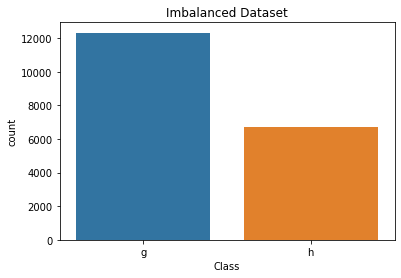

g    12332
h     6688
Name: class, dtype: int64 



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [76]:
names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
'class']
imbalancedDataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',names=names)
plot = sns.countplot('class', data=imbalancedDataset)
plt.title('Imbalanced Dataset')
plt.xlabel('Class')
plt.show()
count = imbalancedDataset['class'].value_counts()
print(count,"\n")
imbalancedDataset

# Data Balancing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


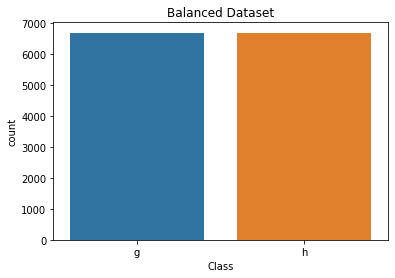

g    6688
h    6688
Name: class, dtype: int64 



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,41.8269,26.3680,3.0422,0.2350,0.1202,24.1335,40.1360,20.4737,29.3920,173.6130,g
1,59.0164,18.0200,3.3073,0.2587,0.1422,57.7010,59.9175,15.4044,1.3107,237.6220,g
2,15.0205,12.1918,2.3560,0.6608,0.3370,1.9014,-2.0715,3.6258,89.2740,105.2140,g
3,51.4720,10.4108,2.5453,0.3276,0.1838,73.5451,17.7028,-7.1886,16.7782,176.5590,g
4,25.3814,15.7361,2.6186,0.4188,0.2419,27.8332,17.8775,5.4552,10.1725,80.3929,g
...,...,...,...,...,...,...,...,...,...,...,...
13371,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
13372,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
13373,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
13374,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [80]:
def balanceDS(dataset):
  under_sampler = RandomUnderSampler(random_state=42)
  return under_sampler.fit_resample(dataset,dataset['class'])[0]

dataset = balanceDS(imbalancedDataset)
plot = sns.countplot('class', data=dataset)
plt.title('Balanced Dataset')
plt.xlabel('Class')
plt.show()
count = dataset['class'].value_counts()
print(count,"\n")
dataset

# Data Splitting

In [87]:
x_train, x_test, y_train, y_test = train_test_split(dataset, dataset['class'], test_size=0.3, random_state=42)



print("imbalanced training set")
count = x_train['class'].value_counts()
print(count,"\n")

train = balanceDS(x_train)

print("Balanced training set")
count = train['class'].value_counts()
print(count,"\n")

train


imbalanced training set
h    4699
g    4664
Name: class, dtype: int64 

Balanced training set
g    4664
h    4664
Name: class, dtype: int64 



,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,29.3567,16.4765,2.7796,0.4037,0.2301,17.4037,20.8865,-12.5669,7.9947,213.2020,g
1,25.8120,10.1488,2.2956,0.4709,0.2456,-10.5069,-19.7376,4.5985,37.8541,136.7740,g
2,19.5203,16.7042,2.6826,0.4922,0.3250,5.8958,11.4286,12.5715,29.5127,53.5969,g
3,36.1484,19.9773,2.8692,0.2919,0.1574,-0.1948,-30.4106,-8.9065,4.6718,194.4190,g
4,29.7378,12.0744,2.5821,0.4058,0.2212,-34.6078,-25.0755,10.3506,14.9080,184.8740,g
...,...,...,...,...,...,...,...,...,...,...,...
9323,38.8137,13.6915,2.7819,0.3567,0.1832,16.5395,23.1874,-1.9985,52.9751,214.3881,h
9324,81.0092,10.5810,2.5173,0.4593,0.2341,-15.7115,-95.2555,7.1982,18.3564,116.2746,h
9325,154.1471,79.2754,2.8732,0.4743,0.2306,-140.3366,-99.2896,76.3853,23.6810,390.8436,h
9326,180.1338,84.4265,3.9838,0.0728,0.0333,-218.3388,-161.9227,59.0186,76.8384,223.0970,h
